In [4]:
# Code up an iterative procedure that allows you to calculate a 
# new r = r1 and theta = theta1 starting from the periastron point 
# r0 = a(1-e) at initial time t = 0 and initial angle theta_0 = 0
# This procedure should allow you to calculate r and theta at each 
# time-step covering a full orbital period of a planet.

import numpy as np
import matplotlib.pyplot as plt  
import scipy.constants as sci
import math

## Homework One

In [50]:
def calc_temps(temperature, smo_int):
    avg_temp = np.zeros(temperature.size)
    j = 0
    #print(temperature.size)
    while j < temperature.size:

        if j - smo_int < 0:
            sub = np.append(temperature[j-smo_int:],temperature[:j+smo_int])
        elif j + smo_int > temperature.size:
            sub = np.append(temperature[j-smo_int:],temperature[:j+smo_int-temperature.size])
        else:
            sub = temperature[j-smo_int:j+smo_int]

        avg_temp[j] = np.average(sub)

        j += 1
    return avg_temp

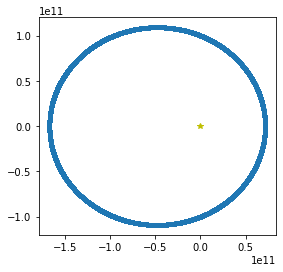

In [90]:
### Question 1


fig,ax = plt.subplots()

## Initial Values
a = 0.8*1.49 * 10**11 # meters #20. # 1.496e+11 # semi major axis ## one AU
e = 0.4 # eccentricity
theta = 0.

# Constants
M = 2*10**30 #kg ## Mass of Star
#m_planet = 6.0*10**24 #kg ## Mass of Planet
G = 6.67408*10**-11 #6.67408 × 10-11 m3 kg-1 s-2 ## Gravitational Constant

Lsun = 3.83*10**26 # Watts ## Luminosity of Star
albedo = 0.3

itern = 50000 ## Number of iterations

## Find the Period
period = (4 * (np.pi)**2 * a**3 / (G * M))**(1/2.) ## how long it takes to go around star 
## Find specific momentum
L = (G*M*a*(1.-e**2))**(1/2.)


#a^3 / T^2 = GM/4pi^2
#T^2 = 4pi^2 a^3 / GM

steps = np.linspace(0,period,itern)
x = np.zeros(itern)
y = np.zeros(itern)
radial_distance = np.zeros(itern)
temperature = np.zeros(itern) # temperature
Temp_init = (Lsun*(1-albedo)/(16*np.pi*sci.sigma*a**2))**(1/4)

del_T = period / itern

t=0

while t < itern:
    ## Find new radius and theta
    r = a * (1 - e**2) / (1 + e * np.cos(theta))
    del_theta = L * del_T / r**2
    theta = theta + del_theta
    
    ## Find new location
    x[t] = r*np.cos(theta)
    y[t] = r*np.sin(theta)
    radial_distance[t] = r
    
    # Find equilibrium temperature, for Q2
    temperature[t] = (Lsun*(1-albedo)/(16*np.pi*sci.sigma*r**2))**(1/4)
    
    # Next Iteration
    t += 1

    
    
plt.plot(x, y, ".")
plt.plot(0,0,"y*")
circle1 = plt.Circle((0, 0), R_star, color='r')
plt.gca().add_patch(circle1)
ax.set_aspect('equal', adjustable='box')

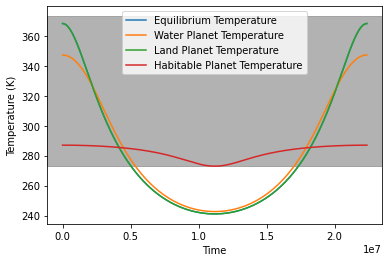

In [66]:
#### Question 2

smooth = 1#*4  # 1/2 months to smooth over 
            # value of 1 for water (2 months total)
    ## 4 times the heat capacity of water keeps the exoplanet in the habitable zone year round

## Number of iterations corresponding to interval being averaged
smo_int = int((itern / period * 30*24*60*60 * smooth))
avg_temp = calc_temps(temperature, smo_int)

smooth_2 = 1. / 40. # smoothing due to a planet made of only land
smo_int_2 = int((itern / period * 30*24*60*60 * smooth_2))
avg_temp_2 = calc_temps(temperature, smo_int_2)
## A planet made out of land would better fit the equilibrium temperature

smooth_3 = 1. * 3.87 # smoothing to make a habitable planet
smo_int_3 = int((itern / period * 30*24*60*60 * smooth_3))
avg_temp_3 = calc_temps(temperature, smo_int_3)
## Only a planet made of something like ammonia or hydrogen could possibly have a heat capacity high enough
## Materials with a heat capacity four times that of water (4.184 J/g/K * 4) are not common, 
## the closest is Hydrogen at 14.3 J/g/K

plt.axhspan(273.15, 373.1, color='grey',alpha=0.6)
plt.plot(steps, temperature, label="Equilibrium Temperature")
plt.plot(steps, avg_temp, label="Water Planet Temperature")
plt.plot(steps, avg_temp_2, label="Land Planet Temperature")
plt.plot(steps, avg_temp_3, label="Habitable Planet Temperature")
plt.ylabel('Temperature (K)')
plt.xlabel('Time')
plt.legend()
#ax.axspan()
#ax.set_ylim([0,15])
#plt.axhline(y=273.15)
#plt.axhline(y=373.1)



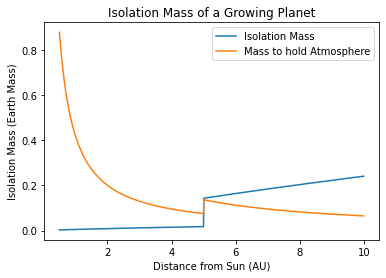

In [67]:
#### Question 3
N = 1000

M_earth = 5.97*10**27 # grams
M_star = 2*10**33 / M_earth # in earth masses
## Conversion factor of g/cm^2 to M_earth/AU^2
convert = (1.49*10**13)**2 / (M_earth) 
sigma_0 = 1.7*10**3 # g/cm^2
cove = 1.49*10**13 # cm in 1 au

r = np.linspace(0.5,10,num=N) # in AU
sigma_p = np.zeros(N)
M_iso = np.zeros(N)
M_env = np.zeros(N)
T_disk = np.zeros(N)

i = 0
while i < r.size:
    if r[i] < 5: #au  # rocky 
        sigma_p[i] = convert * 17 * r[i]**(-3/2)
        rho_m = 5 # g/cm^3
    else: # dirty ice
        sigma_p[i] = convert * 4 * 17 * r[i]**(-3/2)
        rho_m = 1.3 # g/cm^3
    M_iso[i] = 166 * convert * (M_star)**(-1/2.) * sigma_p[i]**(3/2.) * r[i]**(3)
    T_disk[i] = (6*10**9 * r[i]**(-3))**(1/4)
    M_env[i] = 1.6*10**-6 * (rho_m)**(-1/2.) * (T_disk[i])**(3/2.) * (np.log(2*rho_m*(r[i]*cove)/sigma_0))**(3/2.)       
    
    i += 1

plt.plot(r, M_iso, label="Isolation Mass")
plt.plot(r, M_env, label="Mass to hold Atmosphere")
plt.xlabel("Distance from Sun (AU)")
plt.ylabel("Isolation Mass (Earth Mass)")
plt.title("Isolation Mass of a Growing Planet")
plt.legend()
print()

## Homework Two

### Problem One: Transits

    a) We can approximate the transit duration as the time it takes the planet to travel 2 times the radius of the star as we can assume that the planet will be passing directly between us and the star. The planet would have to cross the length of the star's disk, which is its diameter/two times its radius. The duration should be approximately 6.3 hours.

In [68]:
### 1a
def vis_viva_equation(r): # returns velocity of body in elliptical orbit
    G = 6.67408*10**-11
    M = 2*10**30
    a = 0.8*1.49 * 10**11
    # v = (GM (2/(distance between bodies) - 1/(semi-major axis)))^1/2
    v = (G*M * (2./r) - (1./a))**(1./2.)
    return v

In [69]:
### 1a
R_star = 695700000 # radius of sun in m
R_planet = 6.371 * 10**6 # radius of earth in m
diameter_star = 2*R_star

# radial_distance = distance between bodies m
# a = semi-major axis m 
# M = mass of star kg
# G = gravitational constant m3 kg-1 s-2

#print(radial_distance[1])

v_init = vis_viva_equation(radial_distance[0]) # m/s

transit_time = diameter_star / v_init # s
sec_conver = 60*60 # number of seconds in one hour

print(transit_time / sec_conver, "hours")
#print(steps)

6.326121830397887 hours


    b) The transit length is 7.6 hours, a little over one hour more than the transit time calculated using the vis viva equation. About an 18% difference.

In [88]:
### 1b
# x
# y
#radial_distance
#steps = time
transit = 0 #np.zeros(itern)
maxi = 0
mini = 0

t = 0
count = 0

while t < itern:
    if x[t] > 0:
        #print("yes")
        if y[t] < R_star and y[t] > -1*R_star:
            transit += del_T
            count += 1
            if t + 1 < itern:
                b = t + 1
            else:
                b = 0
            if y[b] > R_star:
                maxi = steps[b]
            elif y[b] < -1*R_star:
                mini = steps[b]
    t += 1
#transit_times = np.trim_zeros(transit_times)
print(transit / sec_conver, "hours")
print(count, mini, maxi)

7.584743168927548 hours
61 0 3169690.262084479


    c) The equation for transit duration in the Seager textbook is

$$T_{tot} = \frac{P}{\pi}sin^{-1}(\frac{R_{star}}{a}\frac{\sqrt{(1+k)^2 - b^2}}{sin(i)}) \times 
\frac{\sqrt{1-e^2}}{1+esin(w)}$$
$$b = \frac{a cos(i)}{R_{star}}(\frac{1-e^2}{1+esin(w)})$$

Using these equations, the transit should be 10.7 hours long.

In [89]:
#print("Period:", period)
#print("Star's Radius:", R_star)
#print("Semi-Major Axis:", a)
#print("Eccentricity:", e)
omega = 0 # angle of the periapse to the line of sight
incl = sci.pi/2. # inclination of the ellipse
k = R_planet/R_star # just guessing here tbh
#print(k)
## Impact Parameter
b = 0 #(a * np.cos(incl) / R_star) * (1-e**2) / (1 + e*np.sin(omega)) 
# decided to set the impact parameter to 0

s1 = period / sci.pi
inni = (R_star / a) * (np.sqrt((1+k)**2-b**2) / np.sin(incl))
s2 = np.arcsin(inni)
s3 = (np.sqrt(1-e**2)) / (1 + e*np.sin(omega))
print(s1*s2*s3 / sec_conver, "hours")


10.682628092745157 hours


    d) Omega is now pi, the apoapse (the high point of the orbit) is directed towards the viewer.

Transit duration using Simulation: 17.7 hours

#### How eccentric to know that the eccentricity is not 0 with a transit duraiton precision of 10%?

Assuming that the vis viva equation gives the transit period for a circular orbit and the Simulation adjusts for eccentricity appropriately. 

$T_{circ} = 12.6$ hours

$1.1 \times T_{circ} = 13.8$ hours

$T(e = 0.1) = 13.9$ hours

The planet would need to have an eccentricity of approximately e = 0.095 to know for sure from the transit duration that the eccentricity is not e = 0. 

#### Why would it be harder to infer that the eccentricity wasn't circular for a planet where the periapse is pointed towards the viewer?

The planet spendds less time in periapse than apoapse, a longer duration means that you can measure the error much better. At apoapse, the planet spends less time transiting than in a cicular case, but that is more difficult to measure with precision. 

In [86]:
e = 0.4

steps = np.linspace(0,period,itern)
x = np.zeros(itern)
y = np.zeros(itern)
radial_distance = np.zeros(itern)
temperature = np.zeros(itern) # temperature
Temp_init = (Lsun*(1-albedo)/(16*np.pi*sci.sigma*a**2))**(1/4)

del_T = period / itern

t=0

while t < itern:
    ## Find new radius and theta
    r = a * (1 - e**2) / (1 + e * np.cos(theta))
    del_theta = L * del_T / r**2
    theta = theta + del_theta
    
    ## Find new location
    x[t] = r*np.cos(theta)
    y[t] = r*np.sin(theta)
    radial_distance[t] = r
    
    # Find equilibrium temperature, for Q2
    temperature[t] = (Lsun*(1-albedo)/(16*np.pi*sci.sigma*r**2))**(1/4)
    
    # Next Iteration
    t += 1

In [87]:
### Simulation
transit = 0 #np.zeros(itern)
maxi = 0
mini = 0

t = 0
count = 0

while t < itern:
    if x[t] < 0:
        #print("yes")
        if y[t] < R_star and y[t] > -1*R_star:
            transit += del_T
            count += 1
            if t + 1 < itern:
                b = t + 1
            else:
                b = 0
            if y[b] > R_star:
                maxi = steps[b]
            elif y[b] < -1*R_star:
                mini = steps[b]
    t += 1
#transit_times = np.trim_zeros(transit_times)
simulation = transit / sec_conver
print(simulation, "hours")


17.531947324898034 hours


### Problem Two: Gravitational Lensing

2.

    a) What are the odds that, in a globular cluster, one of the stars in the cluster is being strongly lensed by another in the cluster? Number density = 5 stars per cubed parsec. Cluster has a radius of 100 light years. Cross-section for a strong lensing interaction is a circle with radius 10 AU. 

The probability is $1.132 \times 10^{-6}$

    b) Find Einstein radius in arcsecs of a star 100 lyr away, lensed by star 10 lyrs away. Solar type star = 1 M_star.

$$\theta_E = [\frac{4GM}{c^2} (\frac{1}{D_L} - \frac{1}{D_S})]^{1/2}$$

$D_S$ = distance to source (object further away), $D_L$ = distance to lens (object closer), $M$ = mass of lens

The Einstein radius is $4.9 \times 10^{-2}$ arcseconds.

    c) What semi-major axis would a planet be detectable during a microlensing event?

$D_L$ = 10 light years? 0.15 AU

$D_L$ = 50 light years? 0.25 AU

Astronomers in globular clusters wouldn't be able to find microlensing planets beyond the snowline, as the planets they would detect would be much too close to their parent stars.


In [20]:
num_density = 5 # stars per parsec cubed
cluster_radius = 100 * 0.306601 # parsecs
cross_section = np.pi*(10 * 4.84814 * 10**(-6) )**2 # parsecs
# Probability = number density of stars * cross section * distance being moved through (?)
prob = num_density * cluster_radius * cross_section
print(prob)

1.1319930201309903e-06


In [11]:
#4.30091(25)×10−3 	pc⋅M⊙–1⋅(km/s)2
G = 4.3 * 10**(-3) # pc M_Sun (km/s)^2
M = 1 # M_Sun
c = 3*10**5 # km/s

def einstein_radius(D_L, D_S):
    E_radius = ((4.*G*M/c**2)*(1./D_L - 1./D_S))**(1./2.)
    #E_radius *= 206265
    return E_radius # answer in radians

D_L = 10 * 0.3066014 # pc
D_S = 100 * 0.3066014 # pc

E_radius = einstein_radius(D_L, D_S)
E_radius *= 206265 # convert to arcsec
print(E_radius, "arcsec")

# SI, to check
G = 6.627 * 10**(-11)
M = 2*10**(30)
c = 3*10**8

D_L = 9.46*10**16
D_S = 9.46*10**17

print(einstein_radius(D_L, D_S) * 206256, "arcsec")

0.0488542890690569 arcsec
0.04882750145695713 arcsec


In [42]:
D_L = 10 * 0.306601 # pc
E_radius = einstein_radius(D_L, D_S)
aL = E_radius*206265*D_L
print(aL)

D_L = 50 * 0.306601 # pc
E_radius = einstein_radius(D_L, D_S)
aL = E_radius*206265*D_L # au
print(aL)


0.14978784739366666
0.2496465570760799


### Problem Three: Statistical Analysis

Four stars in a sample. Two have a planet orbiting within 1 AU. What can be said about $f$ the fraction of all stars in the Galaxy that have a planet orbiting at 1 AU? $f$ = #stars with planets / all stars in galaxy

    a) 
    
$p(D_i|f)$

|Star # | Star has Planet | Probability |
| --- | --- | --- |
| $1$ | $1$ | $f$ |
| $2$ | $1$ | $f$ |
| $3$ | $0$ | $1-f$ |
| $4$ | $0$ | $1-f$ |

    b) 
    
Two stars have planets: $p(\{D\}|f) = f^2 \times (1-f)^2$

    c) plot of likelihood, 
$p(\{D\}|f)$ vs $f$

        i. 0, 1
        ii. 1/2
        iii. Connect dots with gaussian curve
        iv. repeat to show how shape changes with 1/4 or 3/4 detections
        
    d) Confidence interval. 
    
$0.5 \pm 0.1448$

    e) Confident that funding would be safe publishing this result?
No, because the sample size is so small.

[1 1 0 0]
mean: 0.5
std: 0.5


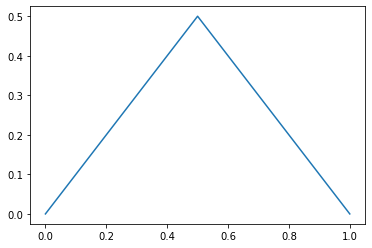

In [263]:
data = np.array([1,1,0,0])
mean = np.mean(data)
sig = np.std(data)
print(data)
print("mean:", mean)
print("std:",sig)

sett = [0, 0.5, 1]
prob = [0, 0.5, 0]

#plt.plot(sett, prob)

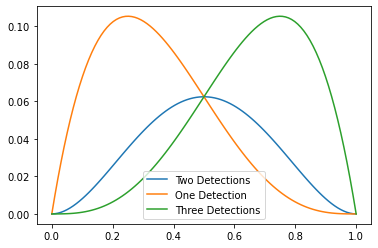

In [8]:
mu, sigma = 0.5, 0.5
s = np.linspace(0, 1, 100)

fun1 = np.multiply(np.power(s, 2), np.power((1-s), 2)) 
fun2 = np.multiply(np.power(s, 1), np.power((1-s), 3))
fun3 = np.multiply(np.power(s, 3), np.power((1-s), 1))

plt.plot(s, fun1, label="Two Detections")
plt.plot(s, fun2, label="One Detection")
plt.plot(s, fun3, label="Three Detections")

plt.legend()
plt.show()

#b = np.linspace(0.,1.,1000)
#plt.plot(b,s)
#count, bins, ignored = plt.hist(s, 30, density=True)
'''plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
               np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
         linewidth=2, color='r')


mu, sigma = 0.25, 0.4330127018922193
s = np.random.normal(mu, sigma, 1000)

plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
               np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
         linewidth=2, color='b')


mu, sigma = 0.75, 0.4330127018922193
s = np.random.normal(mu, sigma, 1000)

plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
               np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
         linewidth=2, color='g')
'''
print()

In [271]:
fwhm = 0.5 * 0.682
print(fwhm)

sigma = fwhm / np.sqrt(8*math.log(2))
print(sigma)

0.341
0.14480936694910726
